# What was the impact of natural disasters globally in the last 20 years?

Data Source: 
EM-DAT: The Emergency Events Database - Université catholique de Louvain (UCL) - CRED, D. Guha-Sapir - https://www.emdat.be, Brussels, Belgium.

Downloaded on 2018-11-18 (Natural-DisastersData.csv) and 2018-10-22 (EMDAT-climateinsurance-ev-noearthquakes.csv)
    
FAQ for the database: https://www.emdat.be/frequently-asked-questions

Time frame for this analysis: 20 years (1998-2018)

Disasters that are included in this analysis: Out of all recorded natural disasters in the EMDAT database, this analysis looks at a subset of data which only includes natural disasters of the following categories: Flood, drought, storm, extreme temperature events


Damage cost is not available for all disasters recorded in the database, so value sums are MINIMUM damage (real ones higher)

Unit of damage cost: "The estimated damage is given in US $ (in thousands) in the value of the year of occurrence."

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

pd.set_option("display.max_rows", 1000)

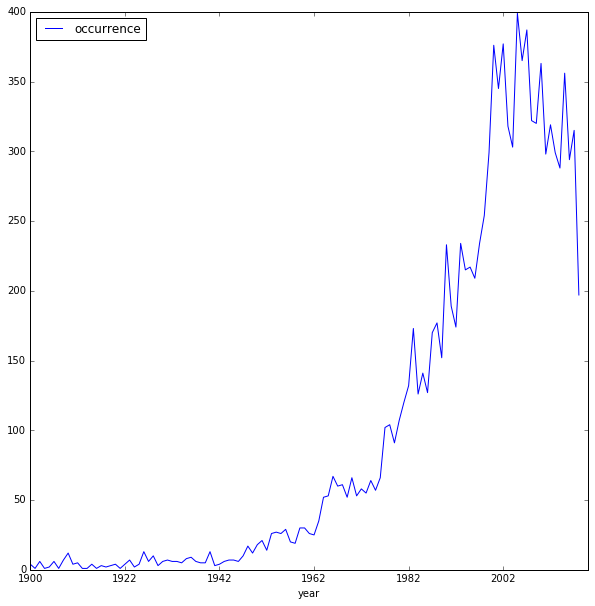

In [4]:
df_disasters=pd.read_csv("data/EMDAT/Natural-DisastersData.csv")
df_disasters.plot(kind='line', x='year',y='occurrence', figsize=(10,10))
# plt.savefig('draft-disastertrend.pdf', transparent=True)

In [22]:
df = pd.read_csv('data/EMDAT/EMDAT-climateinsurance-ev-noearthquakes.csv', delimiter =";", encoding = 'latin-1')
df.head()

,year,iso,country_name,continent,region,disaster_subtype,disaster_type,disaster_subgroup,occurrence,Total_deaths,Injured,Affected,Homeless,Total_affected,Total_damage_K_USD
0,1998,AUS,Australia,Oceania,Australia and New Zealand,Coastal flood,Flood,Hydrological,2,4.0,NaN,1375.0,NaN,1375.0,161300.0
1,1998,JPN,Japan,Asia,Eastern Asia,Coastal flood,Flood,Hydrological,1,16.0,33.0,24000.0,NaN,24033.0,NaN
2,1998,MEX,Mexico,Americas,Central America,Coastal flood,Flood,Hydrological,1,274.0,NaN,25000.0,NaN,25000.0,602700.0
3,1999,KHM,Cambodia,Asia,South-Eastern Asia,Coastal flood,Flood,Hydrological,1,NaN,NaN,106670.0,17805.0,124475.0,NaN
4,1999,COL,Colombia,Americas,South America,Coastal flood,Flood,Hydrological,1,3.0,NaN,NaN,1100.0,1100.0,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2777 entries, 0 to 2776
Data columns (total 15 columns):
year                  2777 non-null int64
iso                   2777 non-null object
country_name          2777 non-null object
continent             2777 non-null object
region                2777 non-null object
disaster_subtype      2777 non-null object
disaster_type         2777 non-null object
disaster_subgroup     2777 non-null object
occurrence            2777 non-null int64
Total_deaths          1897 non-null float64
Injured               662 non-null float64
Affected              2034 non-null float64
Homeless              544 non-null float64
Total_affected        2289 non-null float64
Total_damage_K_USD    1169 non-null float64
dtypes: float64(6), int64(2), object(7)
memory usage: 325.5+ KB


In [24]:
df['disaster_type'].value_counts()

Flood                   1650
Storm                    648
Drought                  347
Extreme temperature      132
Name: disaster_type, dtype: int64

## What is the overall number of disasters per year?

In [25]:
df.groupby(by='year')['occurrence'].sum()

year
1998    134
1999    159
2000    173
2001    181
2002    223
2003    233
2004    218
2005    284
2006    279
2007    304
2008    261
2009    220
2010    268
2011    225
2012    213
2013    225
2014    194
2015    200
2016    129
2017    134
2018     82
Name: occurrence, dtype: int64

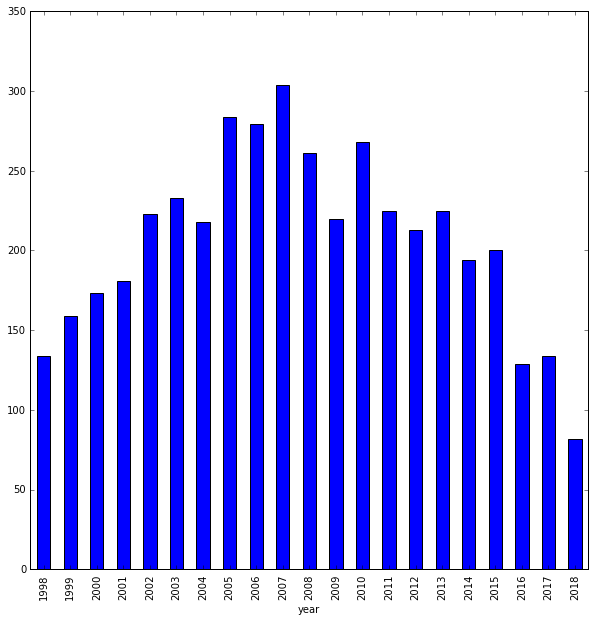

In [26]:
df.groupby(by='year')['occurrence'].sum().plot(kind = 'bar',figsize=(10,10), ylim=(0,350))

## What is the overall damage per year?

In [27]:
df.groupby(by='year')['Total_damage_K_USD'].sum()

year
1998    6.706901e+07
1999    6.099053e+07
2000    3.806193e+07
2001    1.811399e+07
2002    3.243080e+07
2003    4.358786e+07
2004    9.383316e+07
2005    2.017158e+08
2006    2.364735e+07
2007    4.860560e+07
2008    7.154825e+07
2009    2.400337e+07
2010    6.875211e+07
2011    9.419620e+07
2012    1.101913e+08
2013    8.702373e+07
2014    6.659031e+07
2015    4.877033e+07
2016    3.378605e+07
2017    2.679712e+08
2018    2.305839e+07
Name: Total_damage_K_USD, dtype: float64

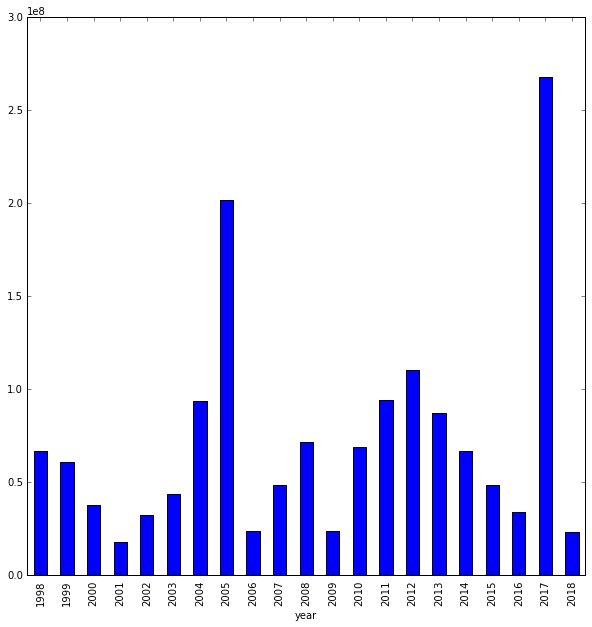

In [28]:
df.groupby(by='year')['Total_damage_K_USD'].sum().plot(kind='bar',figsize=(10,10))

## What amount of damage do different types of natural disasters cause?

In [29]:
df.groupby(by='disaster_type')['Total_damage_K_USD'].sum()

disaster_type
Drought                 1.164208e+08
Extreme temperature     1.865786e+07
Flood                   4.750031e+08
Storm                   9.138656e+08
Name: Total_damage_K_USD, dtype: float64

In [30]:
df['disaster_type'].value_counts()

Flood                   1650
Storm                    648
Drought                  347
Extreme temperature      132
Name: disaster_type, dtype: int64

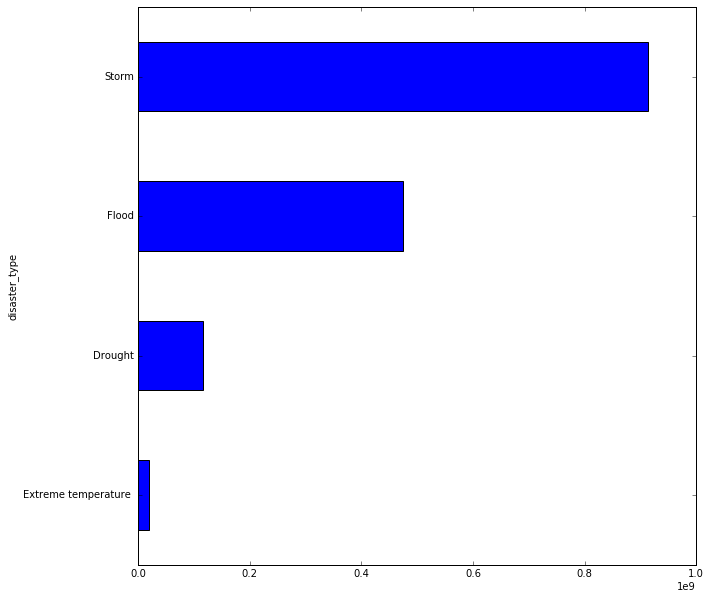

In [31]:
df.groupby(by='disaster_type')['Total_damage_K_USD'].sum().sort_values().plot(kind='barh',figsize=(10,10))

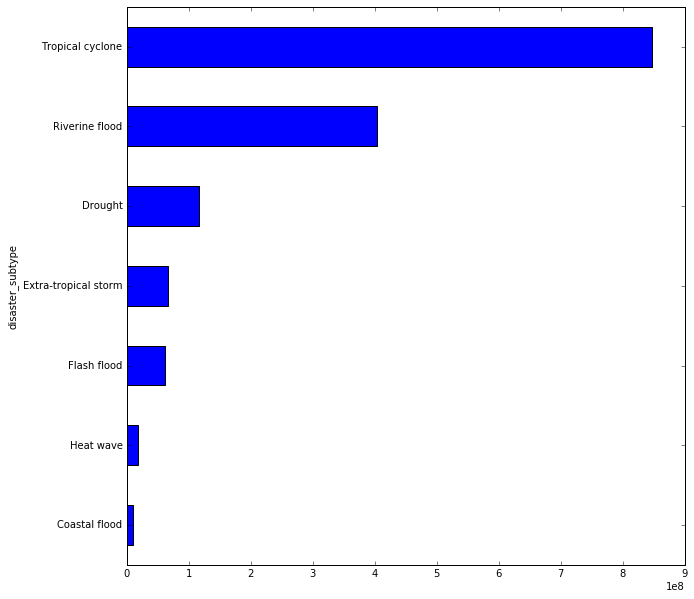

In [32]:
df.groupby(by='disaster_subtype')['Total_damage_K_USD'].sum().sort_values().plot(kind='barh',figsize=(10,10))

## Where was the most damage caused?

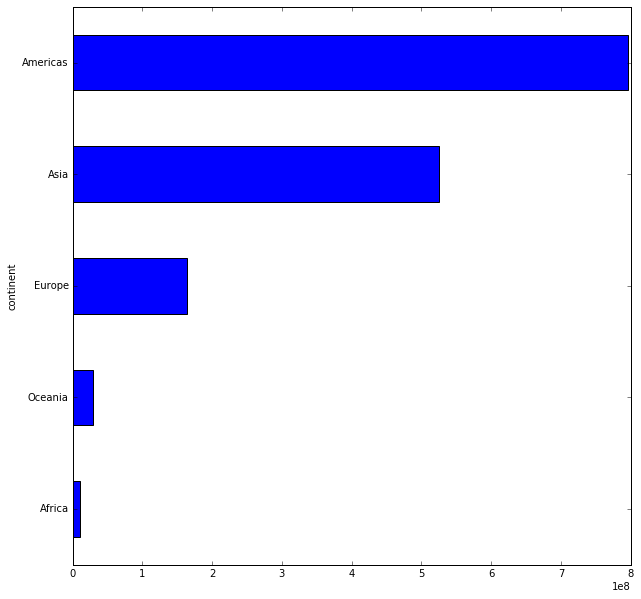

In [33]:
df.groupby(by='continent')['Total_damage_K_USD'].sum().sort_values().plot(kind='barh',figsize=(10,10))

## Which are the most disaster-ridden countries?

In [40]:
df.groupby(by='country_name')['occurrence'].sum().sort_values(ascending=False)

country_name
China                                                         285
Philippines (the)                                             233
India                                                         186
United States of America (the)                                153
Viet Nam                                                      113
Indonesia                                                     106
Mexico                                                         96
Japan                                                          87
Brazil                                                         72
Thailand                                                       66
Afghanistan                                                    65
Bangladesh                                                     65
Pakistan                                                       63
Haiti                                                          60
Australia                                                      

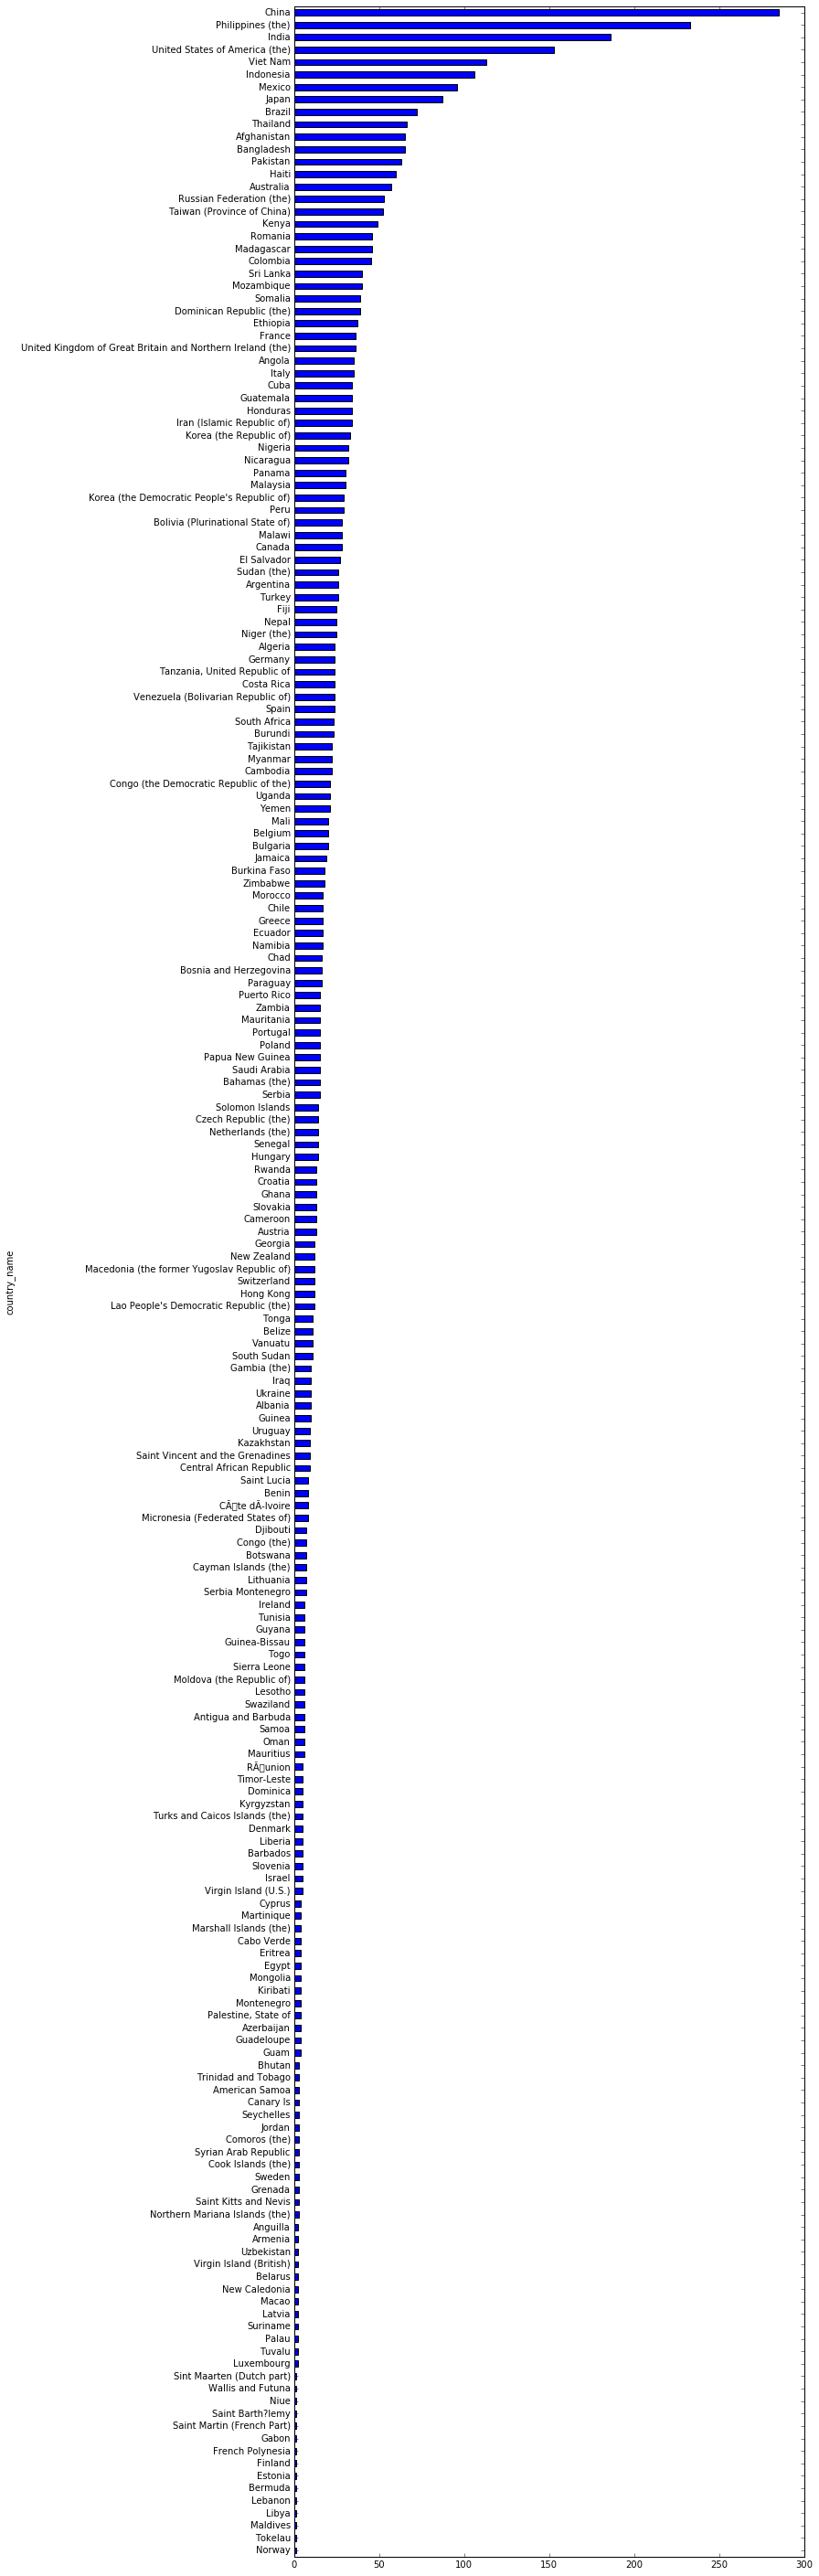

In [20]:
df.groupby(by='country_name')['occurrence'].sum().sort_values().plot(kind='barh',figsize=(10,50))
plt.savefig('draft-occurrence.pdf', transparent = True)

## Which are the countries with the highest damage?

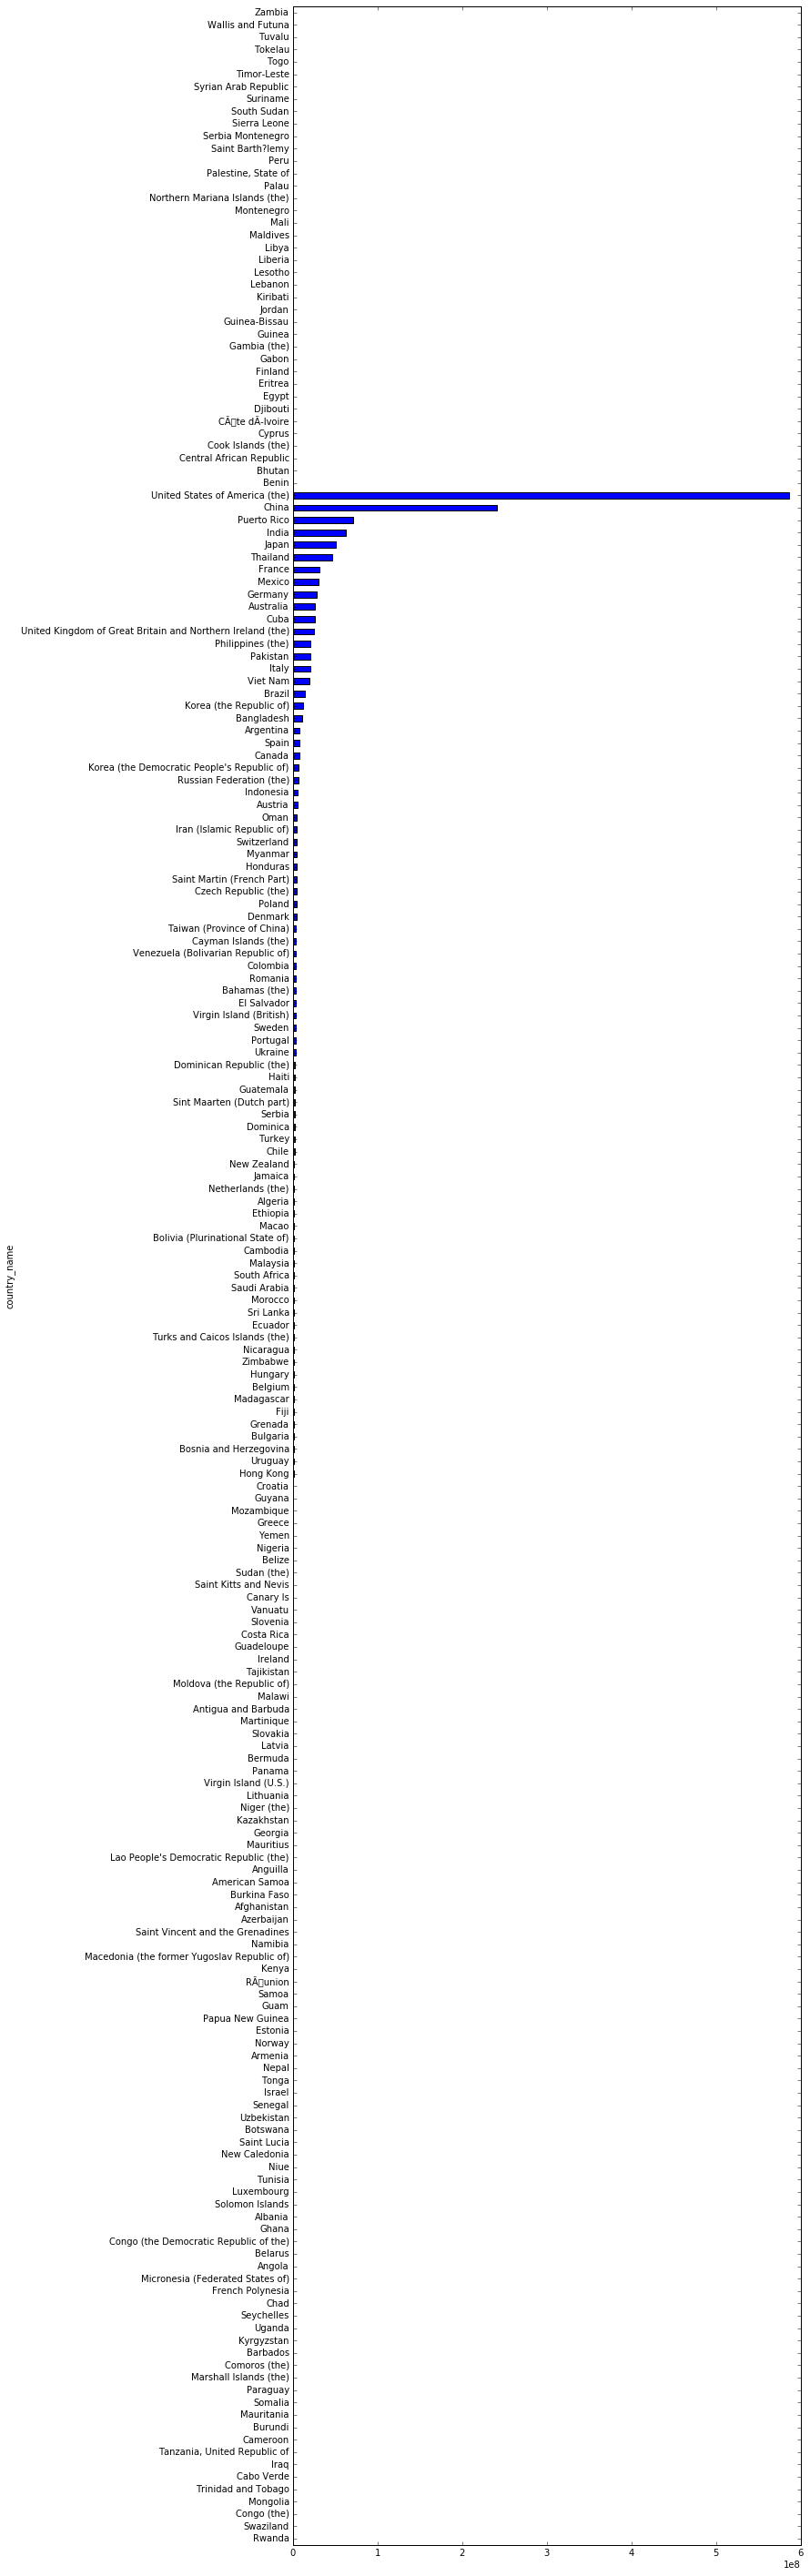

In [86]:
df.groupby(by='country_name')['Total_damage_K_USD'].sum().sort_values().plot(kind='barh',figsize=(10,50))

## Where are the most people affected by natural disasters?

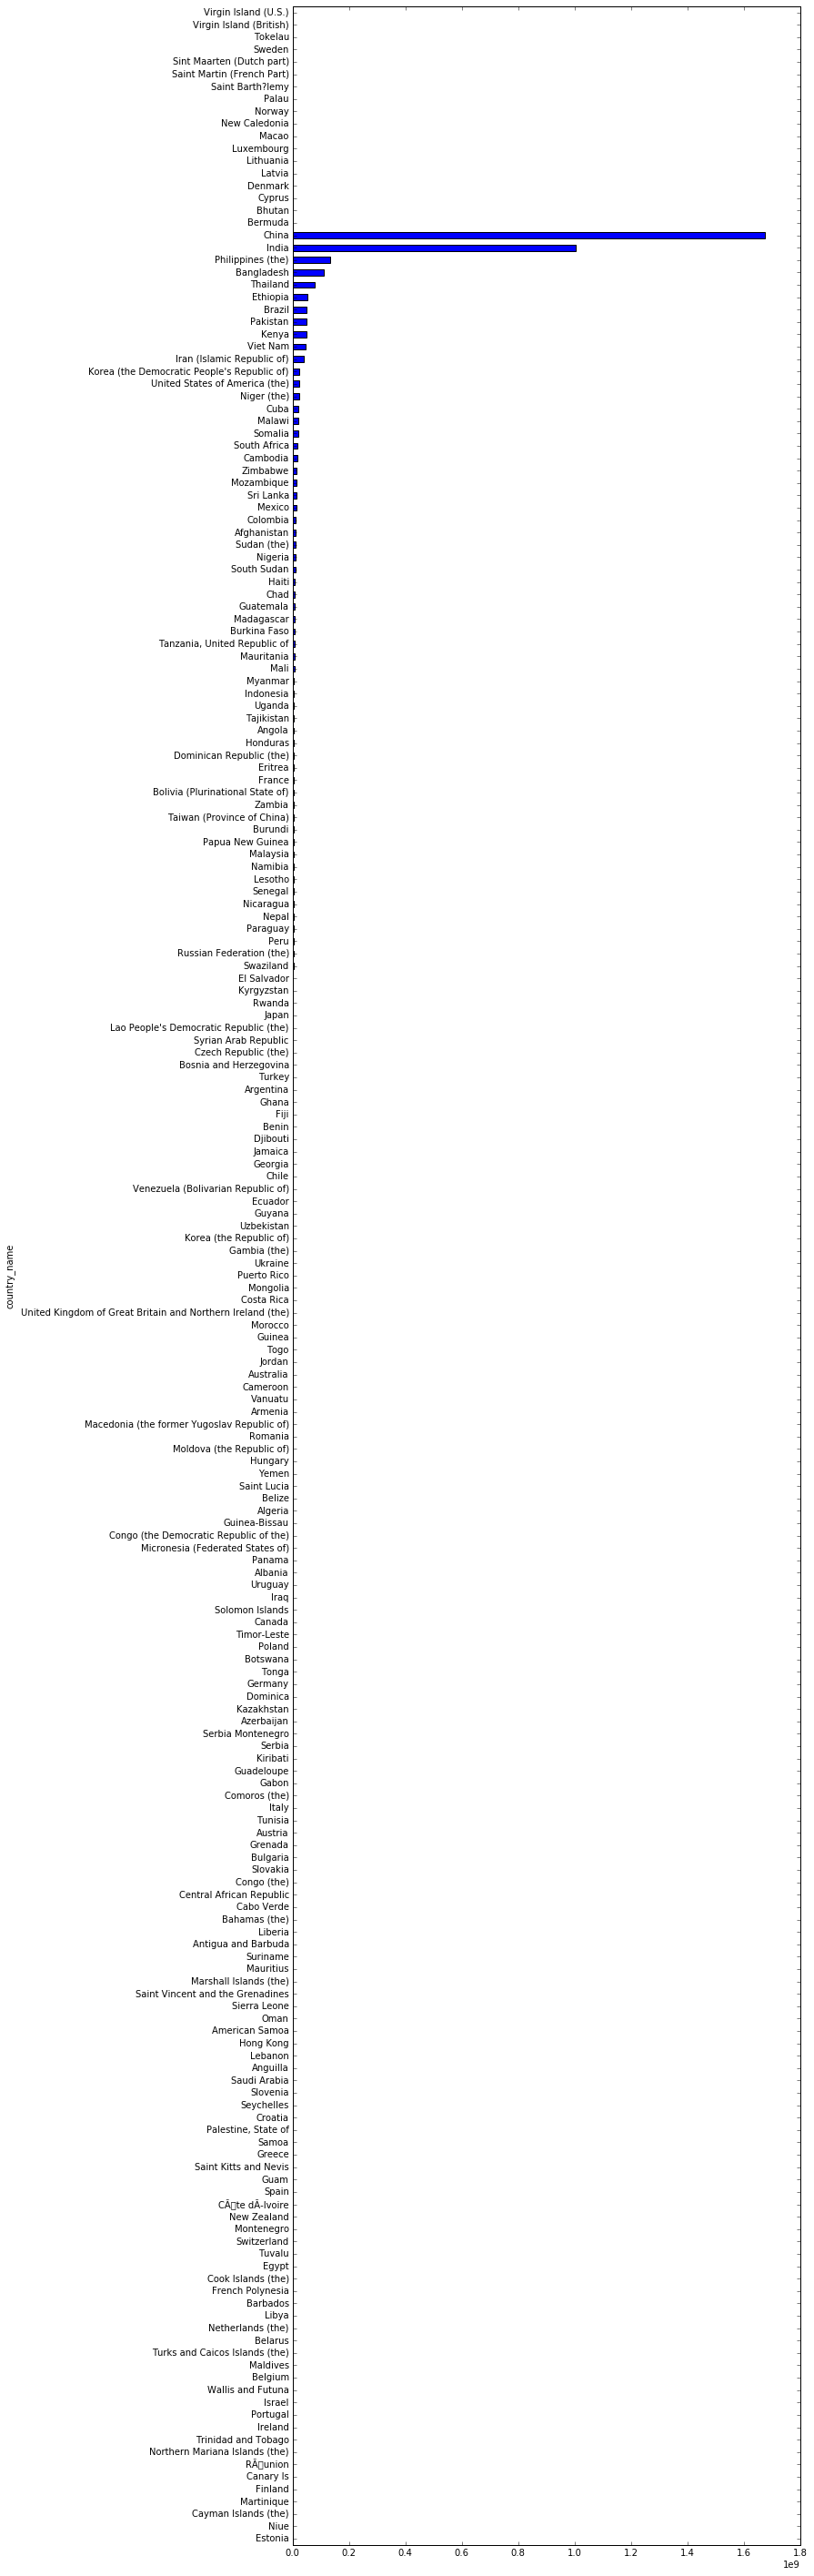

In [87]:
df.groupby(by='country_name')['Affected'].sum().sort_values().plot(kind='barh',figsize=(10,50))

## Do the number of occurrences and the damage caused correlate?

In [88]:
occurrence = df.groupby(by='country_name')['occurrence'].sum().to_frame()
occurrence['country'] = occurrence.index
occurrence = occurrence.reset_index(drop=True)
occurrence.head()

,occurrence,country
0,65,Afghanistan
1,10,Albania
2,24,Algeria
3,3,American Samoa
4,35,Angola


In [89]:
damage = df.groupby(by='country_name')['Total_damage_K_USD'].sum().to_frame()
damage['country'] = damage.index
damage = damage.reset_index(drop=True)
damage.head()

,Total_damage_K_USD,country
0,165050.0,Afghanistan
1,26573.0,Albania
2,1472761.0,Algeria
3,200000.0,American Samoa
4,12000.0,Angola


In [90]:
affected = df.groupby(by='country_name')['Affected'].sum().to_frame()
affected['country'] = affected.index
affected = affected.reset_index(drop=True)
affected.head()

,Affected,country
0,9898744.0,Afghanistan
1,153634.0,Albania
2,196050.0,Algeria
3,20000.0,American Samoa
4,4298387.0,Angola


In [91]:
damage_occurrence = occurrence.merge(damage, right_on='country', left_on = 'country')
damage_occurrence_affected = damage_occurrence.merge(affected, right_on='country', left_on='country')
damage_occurrence_affected = damage_occurrence_affected[['country', 'occurrence', 'Total_damage_K_USD', 'Affected']]
damage_occurrence_affected.head()

,country,occurrence,Total_damage_K_USD,Affected
0,Afghanistan,65,165050.0,9898744.0
1,Albania,10,26573.0,153634.0
2,Algeria,24,1472761.0,196050.0
3,American Samoa,3,200000.0,20000.0
4,Angola,35,12000.0,4298387.0


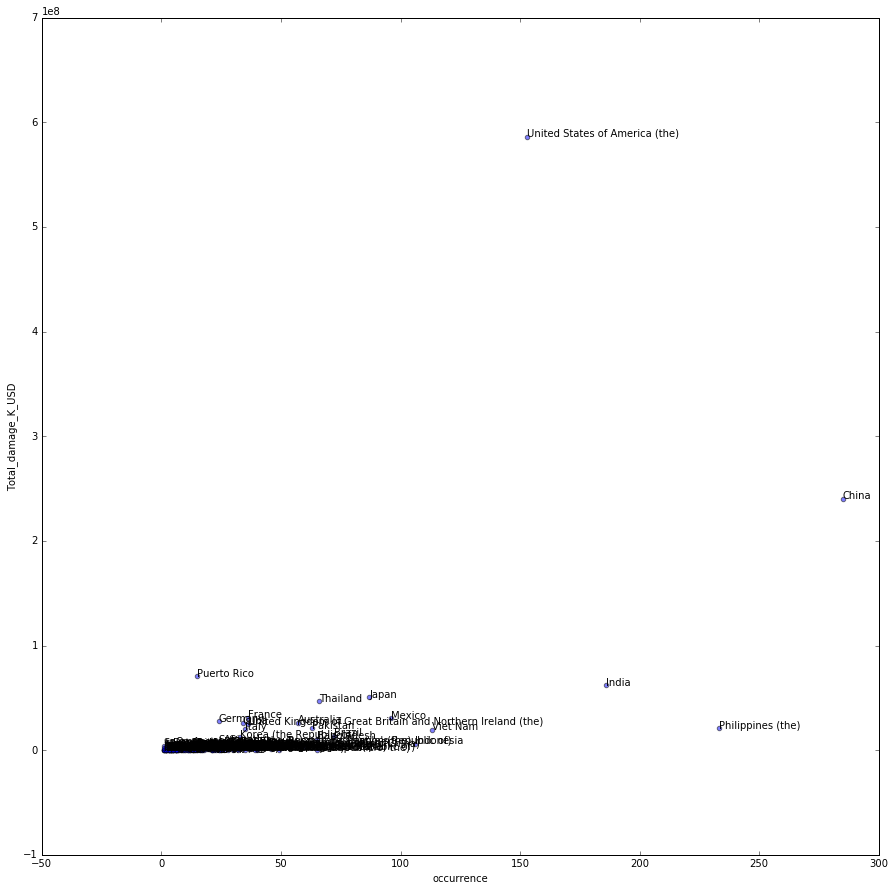

In [92]:
y=damage_occurrence ["Total_damage_K_USD"]
z=damage_occurrence["occurrence"]
n=damage_occurrence["country"]

fig, ax = plt.subplots(figsize=(15,15))
ax = damage_occurrence.plot(ax = ax, kind="scatter", x ="occurrence", y="Total_damage_K_USD", alpha=0.5)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

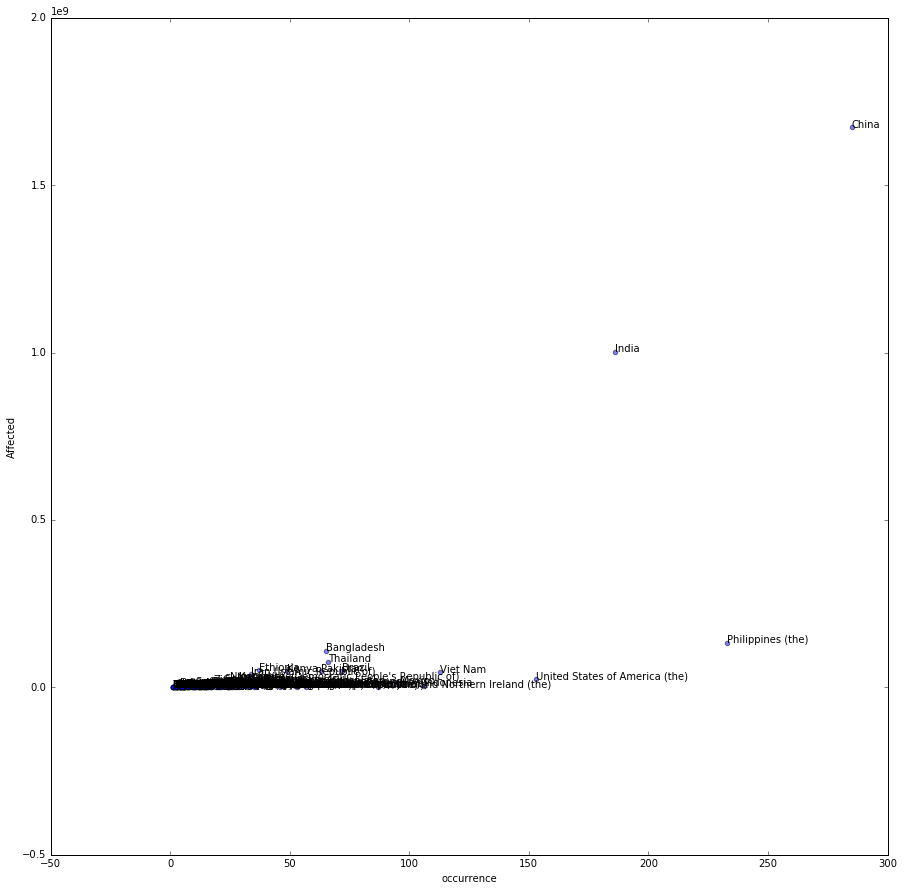

In [93]:
y=damage_occurrence_affected ["Affected"]
z=damage_occurrence_affected["occurrence"]
n=damage_occurrence_affected["country"]

fig, ax = plt.subplots(figsize=(15,15))
ax = damage_occurrence_affected.plot(ax = ax, kind="scatter", x ="occurrence", y="Affected", alpha=0.5)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

Note: Not really a correlation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1164c07b8>]],
      dtype=object)

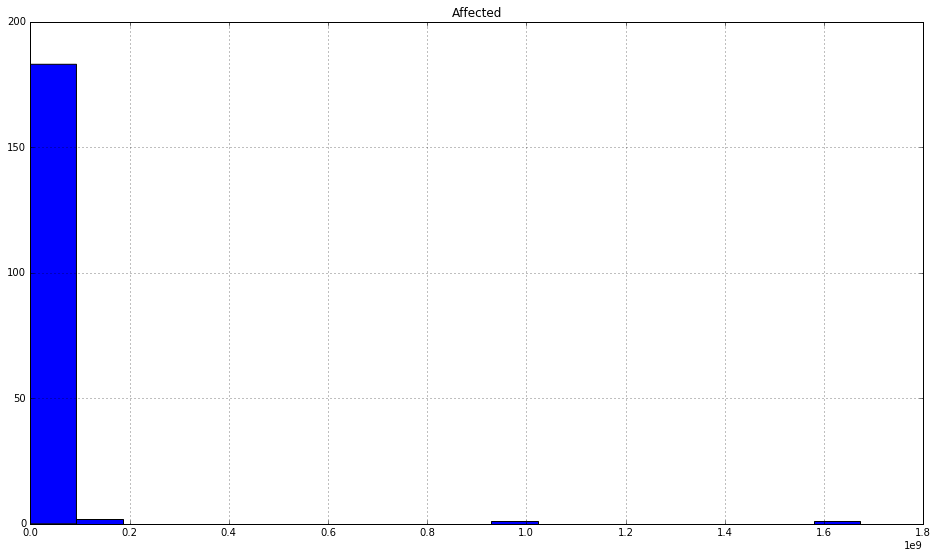

In [94]:
affected.hist(figsize=(16,9),bins=18)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11798f048>]],
      dtype=object)

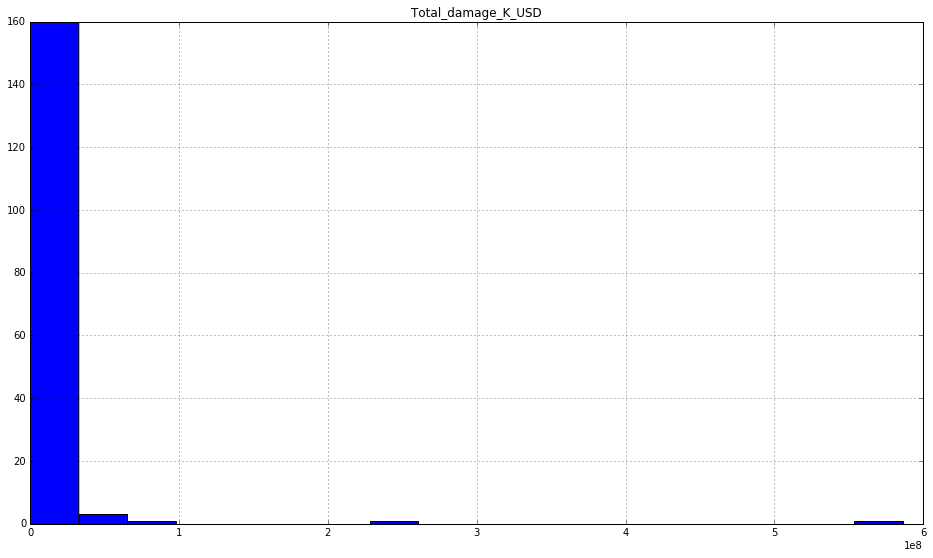

In [95]:
damage.hist(figsize=(16,9),bins=18)

Note: for the majority of countries, the damage caused by natural disasters in the past 20 years is less than about 300 billion USD

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1182663c8>]],
      dtype=object)

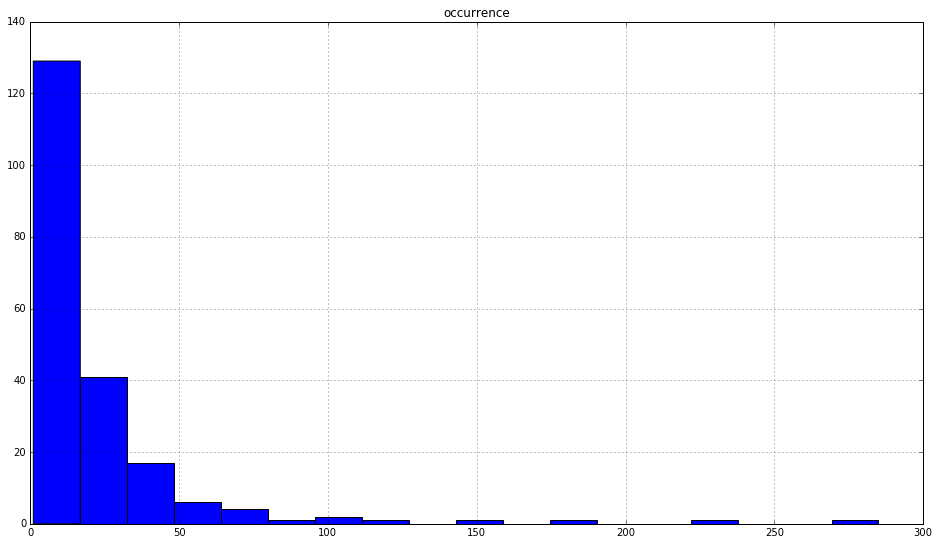

In [96]:
occurrence.hist(figsize=(16,9),bins=18)

Note: 
Little more than 140 countries experienced between 1 and roughly 20 natural disasters in the past 20 years. 
About 40 counties experienced between 21 and almost 50 natural disasters in the past 20 years. Few countries experienced more than 100 disasters in the last 20 years.

KeyError: 'GEO'

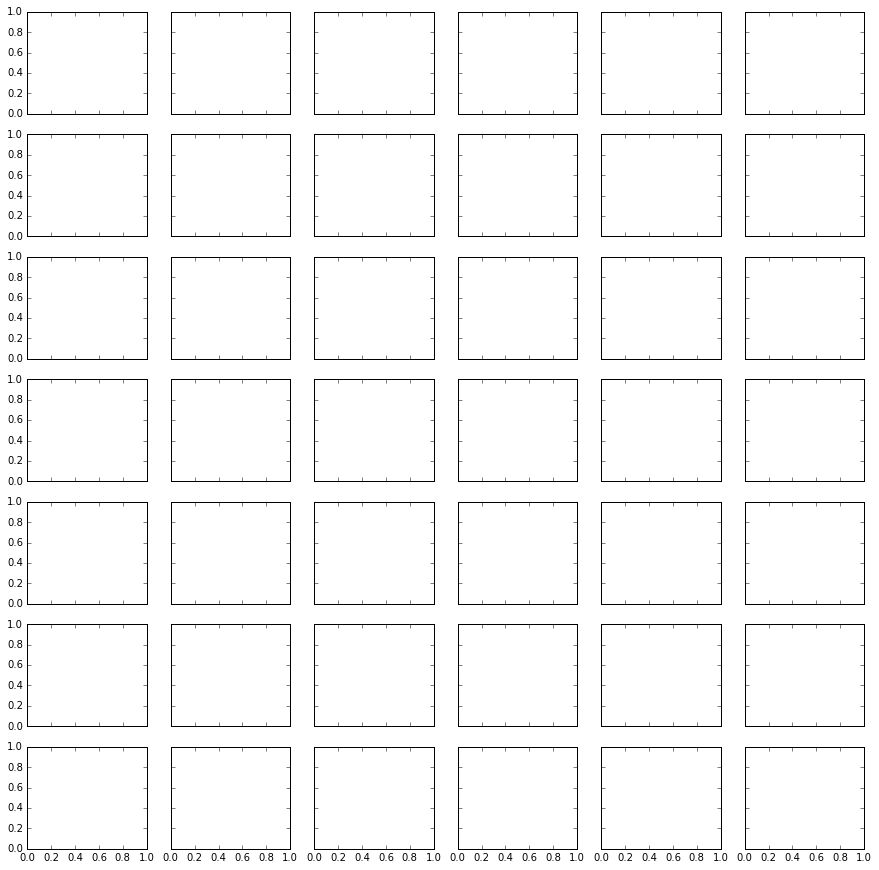

In [98]:
df=df.copy()
fig, axes = plt.subplots(nrows=7, ncols=6, sharex=True, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist]

# countries = 

subset_df = df[df['GEO'].isin(countries)]

for countryname, selection in subset_df.groupby('country_name'):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='elec_d_price', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    #ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()
    
plt.subplots_adjust(hspace=0.55)

# AFRICA

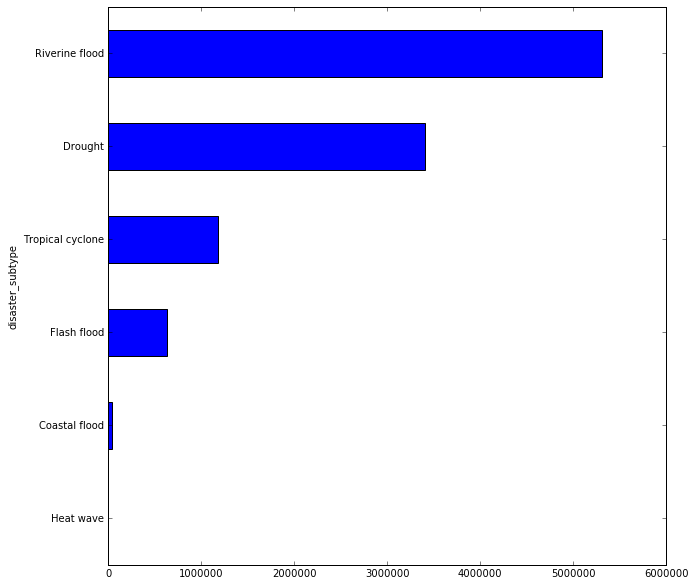

In [99]:
# which are the costliest disaster types in Africa?
df[df['continent']=='Africa'].groupby(by='disaster_subtype')['Total_damage_K_USD'].sum().sort_values().plot(kind='barh', figsize=(10,10))

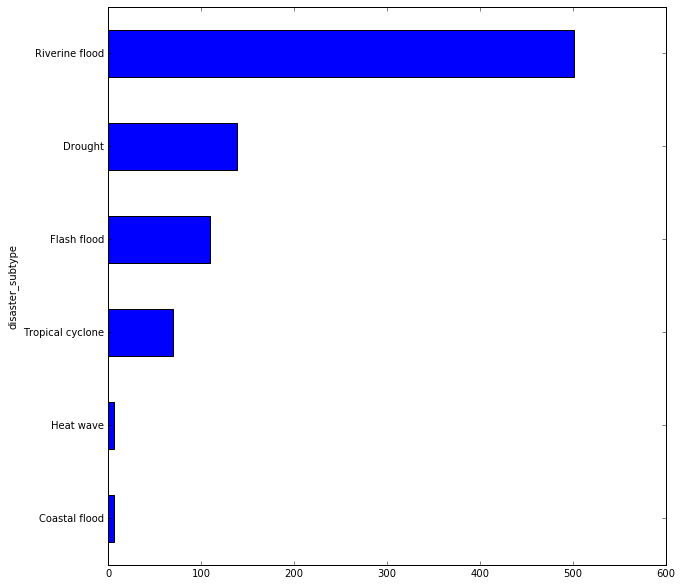

In [100]:
# which are the most frequent disaster types in Africa?
df[df['continent']=='Africa'].groupby(by='disaster_subtype')['occurrence'].sum().sort_values().plot(kind='barh', figsize=(10,10))

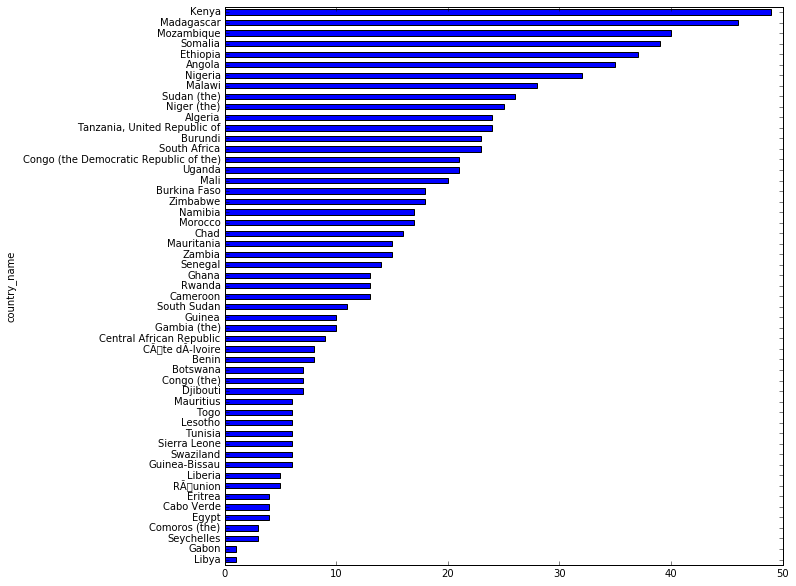

In [101]:
# which are the countries in Africa where most disasters happened?
df[df['continent']=='Africa'].groupby(by='country_name')['occurrence'].sum().sort_values().plot(kind='barh', figsize=(10,10))

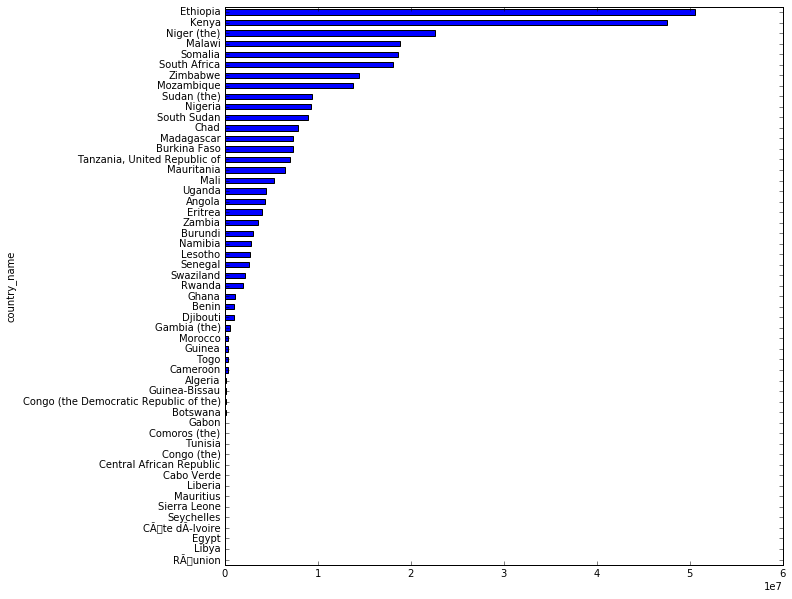

In [102]:
# Which are the countries in Africa where most people are affected by natural disasters?
df[df['continent']=='Africa'].groupby(by='country_name')['Affected'].sum().sort_values().plot(kind='barh', figsize=(10,10))

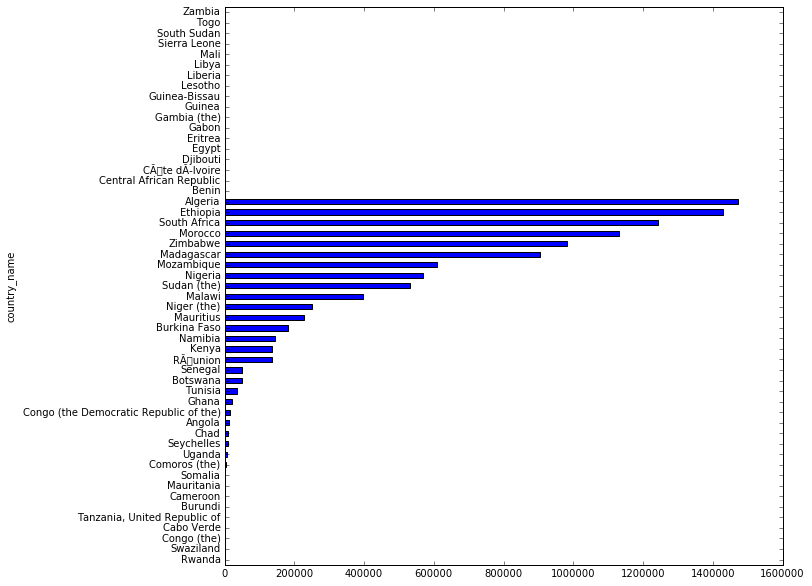

In [103]:
# Which are the countries in Africa where natural disasters caused the most damage?
df[df['continent']=='Africa'].groupby(by='country_name')['Total_damage_K_USD'].sum().sort_values().plot(kind='barh', figsize=(10,10))

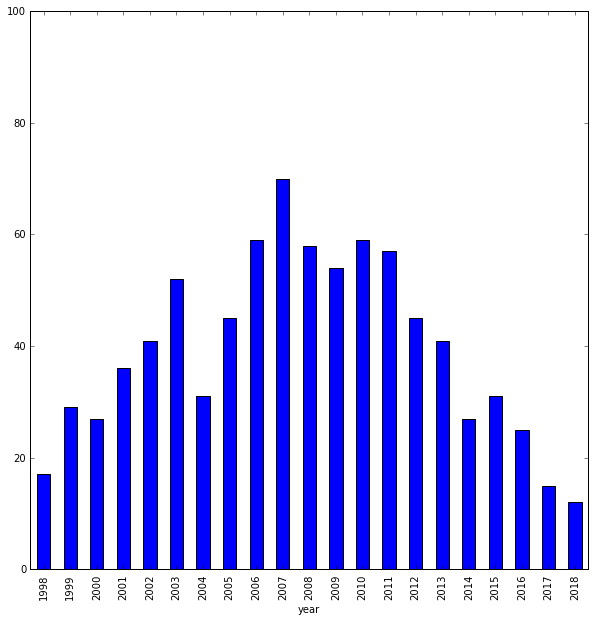

In [104]:
# How many disasters occurred in Africa by year? // has the frequency increased?
df[df['continent']=='Africa'].groupby(by='year')['occurrence'].sum().plot(kind = 'bar',figsize=(10,10), ylim=(0,100))

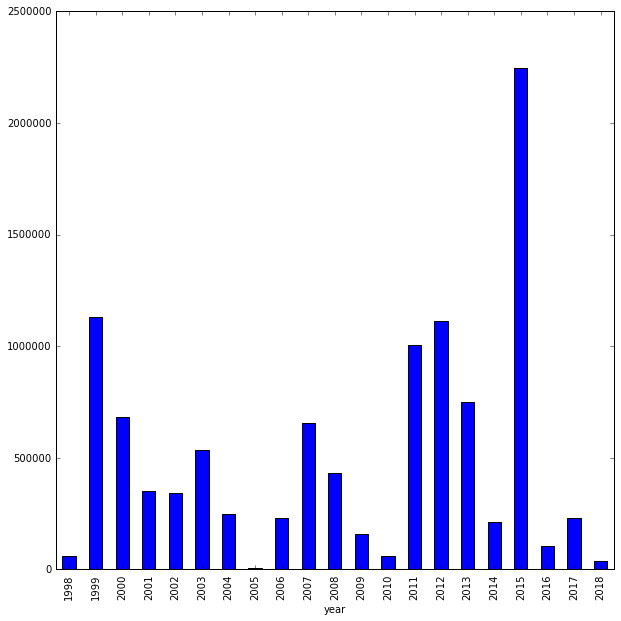

In [105]:
# How much damage did natural disasters cause in Africa by year?
df[df['continent']=='Africa'].groupby(by='year')['Total_damage_K_USD'].sum().plot(kind = 'bar',figsize=(10,10))

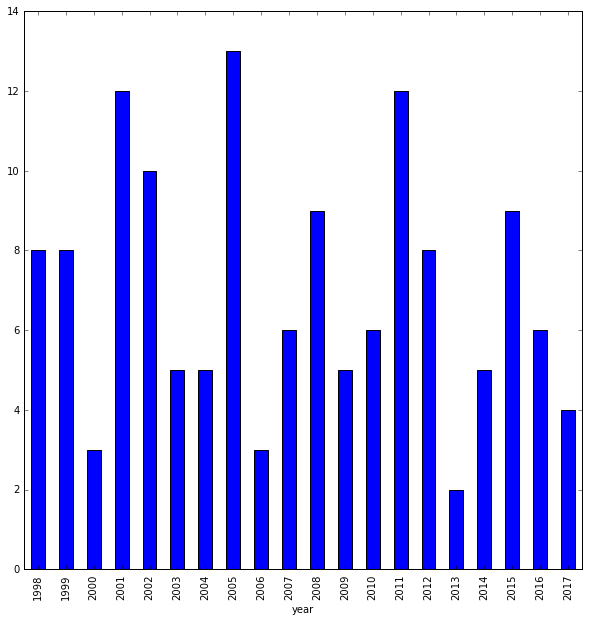

In [106]:
# How frequent have droughts been in Africa?
df[(df['continent']=='Africa')&(df['disaster_subtype']=='Drought')].groupby(by='year')['occurrence'].sum().plot(kind = 'bar',figsize=(10,10))

In [107]:
# How frequent have droughts been in Africa
df[(df['continent']=='Africa')&(df['disaster_subtype']=='Drought')].groupby(by='year')['occurrence'].sum()

year
1998     8
1999     8
2000     3
2001    12
2002    10
2003     5
2004     5
2005    13
2006     3
2007     6
2008     9
2009     5
2010     6
2011    12
2012     8
2013     2
2014     5
2015     9
2016     6
2017     4
Name: occurrence, dtype: int64

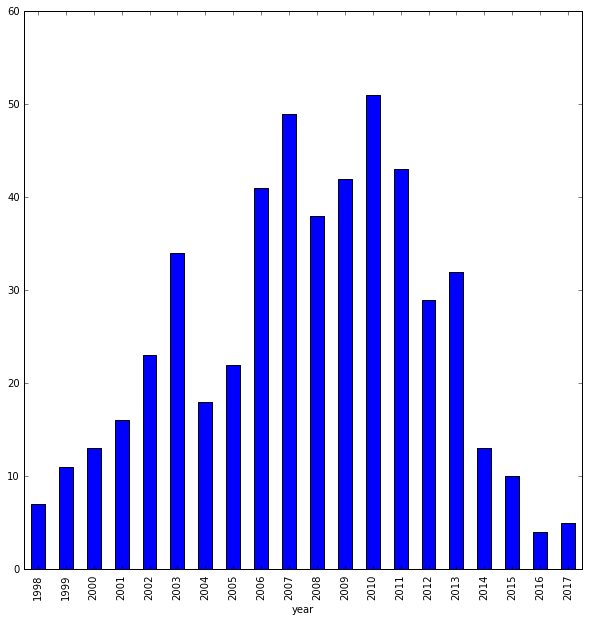

In [108]:
# How frequent have riverine floods been in Africa?
df[(df['continent']=='Africa')&(df['disaster_subtype']=='Riverine flood')].groupby(by='year')['occurrence'].sum().plot(kind = 'bar',figsize=(10,10))

# ASIA

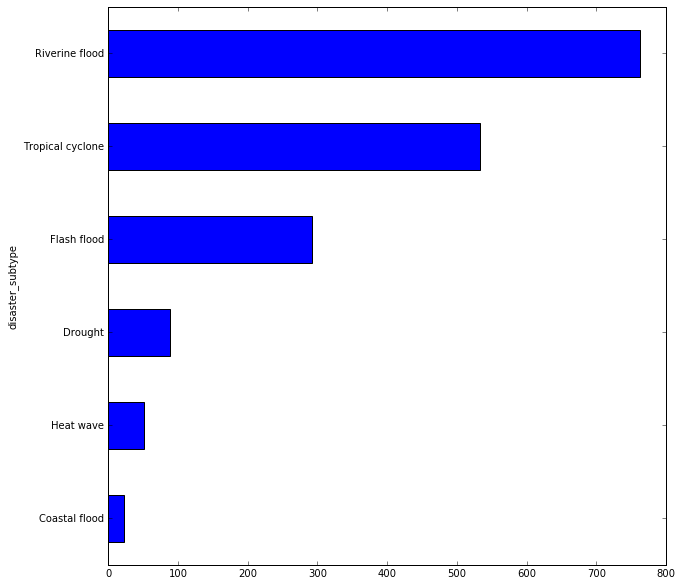

In [109]:
df[df['continent']=='Asia'].groupby(by='disaster_subtype')['occurrence'].sum().sort_values().plot(kind='barh', figsize=(10,10))

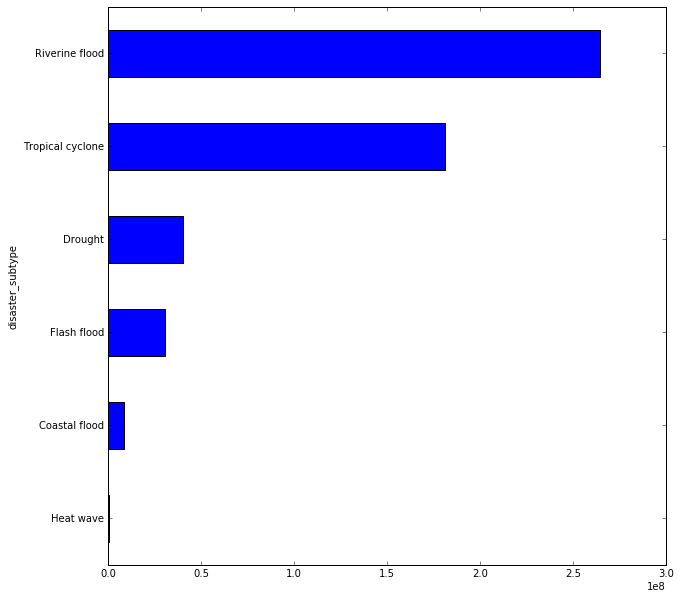

In [110]:
df[df['continent']=='Asia'].groupby(by='disaster_subtype')['Total_damage_K_USD'].sum().sort_values().plot(kind='barh', figsize=(10,10))

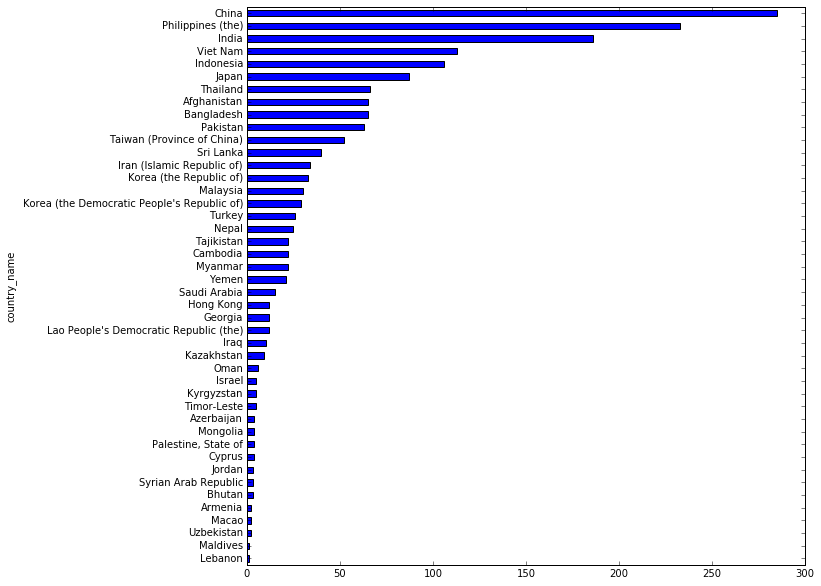

In [111]:
df[df['continent']=='Asia'].groupby(by='country_name')['occurrence'].sum().sort_values().plot(kind='barh', figsize=(10,10))

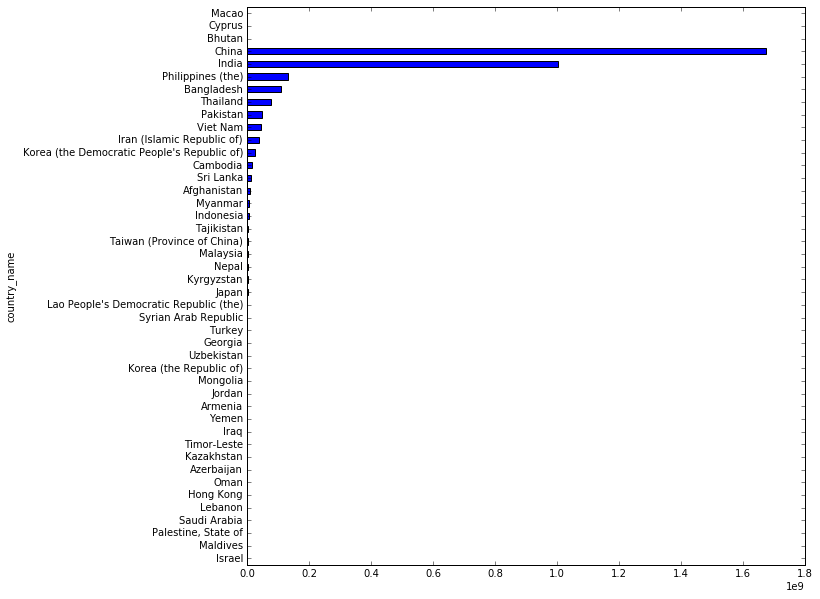

In [112]:
df[df['continent']=='Asia'].groupby(by='country_name')['Affected'].sum().sort_values().plot(kind='barh', figsize=(10,10))

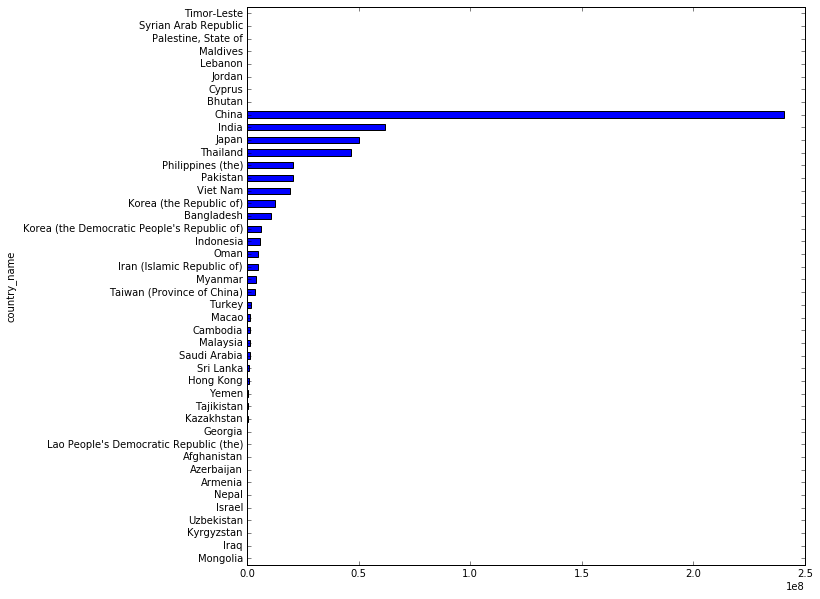

In [113]:
df[df['continent']=='Asia'].groupby(by='country_name')['Total_damage_K_USD'].sum().sort_values().plot(kind='barh', figsize=(10,10))

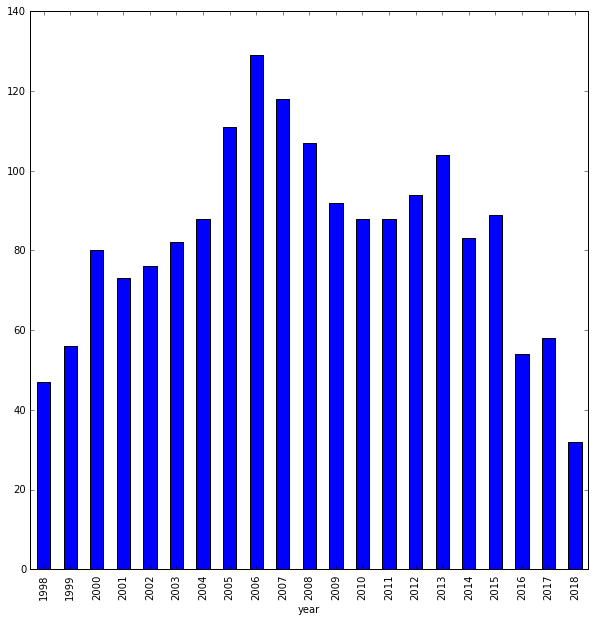

In [114]:
df[df['continent']=='Asia'].groupby(by='year')['occurrence'].sum().plot(kind = 'bar',figsize=(10,10))

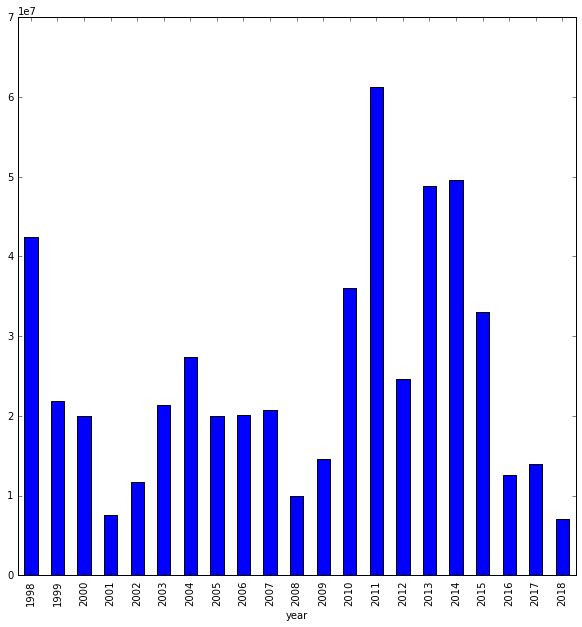

In [115]:
df[df['continent']=='Asia'].groupby(by='year')['Total_damage_K_USD'].sum().plot(kind = 'bar',figsize=(10,10))

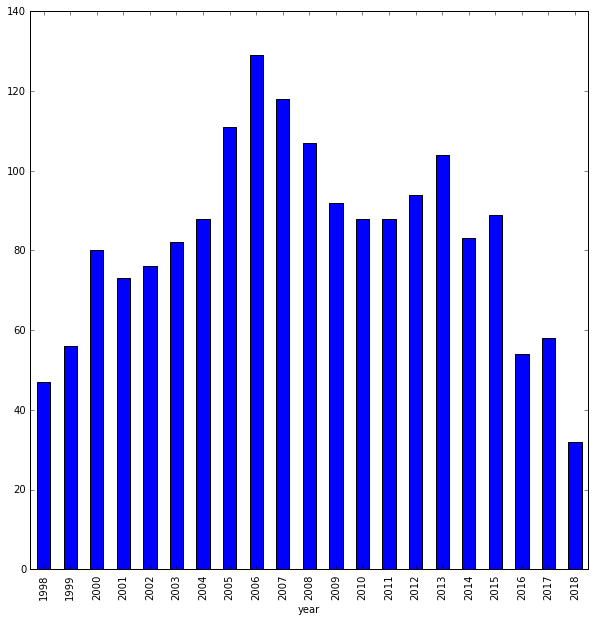

In [116]:
# How many disasters occurred in Asia by year? // has the frequency increased?
df[df['continent']=='Asia'].groupby(by='year')['occurrence'].sum().plot(kind = 'bar',figsize=(10,10))

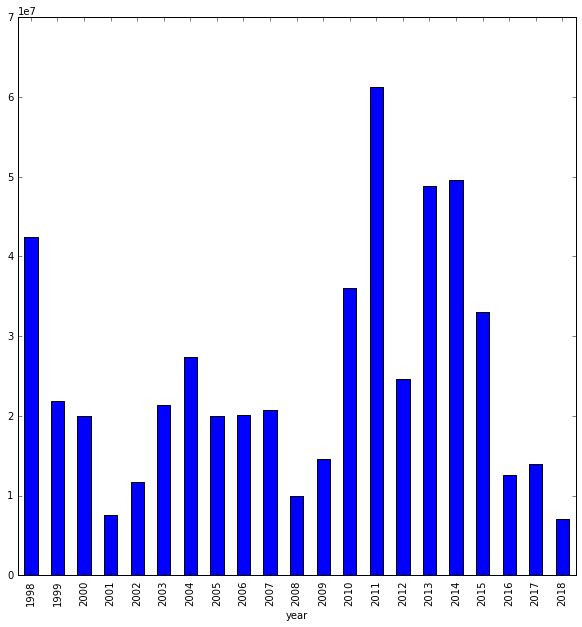

In [117]:
# How much damage did natural disasters cause in Asia by year?
df[df['continent']=='Asia'].groupby(by='year')['Total_damage_K_USD'].sum().plot(kind = 'bar',figsize=(10,10))

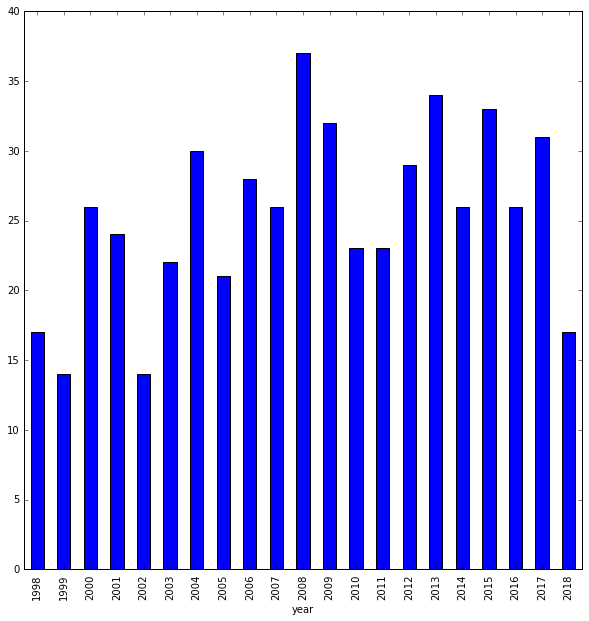

In [118]:
# How frequent have tropical cyclones been in Asia?
df[(df['continent']=='Asia')&(df['disaster_subtype']=='Tropical cyclone')].groupby(by='year')['occurrence'].sum().plot(kind = 'bar',figsize=(10,10))

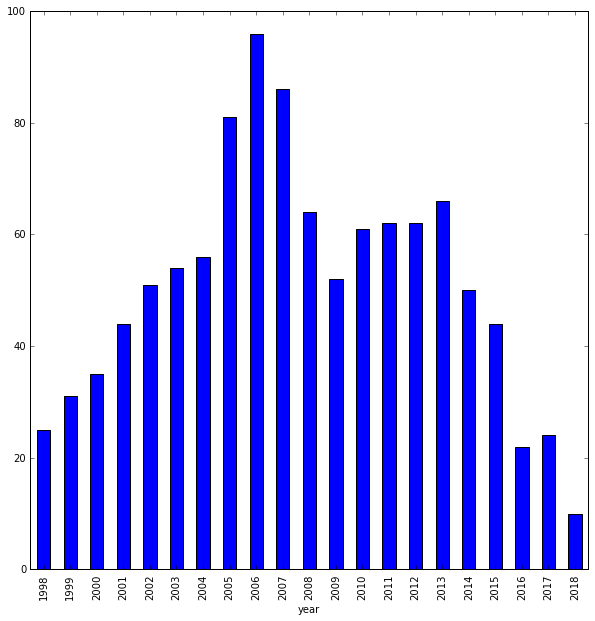

In [119]:
# How frequent have floods been in Asia?
df[(df['continent']=='Asia')&(df['disaster_type']=='Flood')].groupby(by='year')['occurrence'].sum().plot(kind = 'bar',figsize=(10,10))

# Oceania

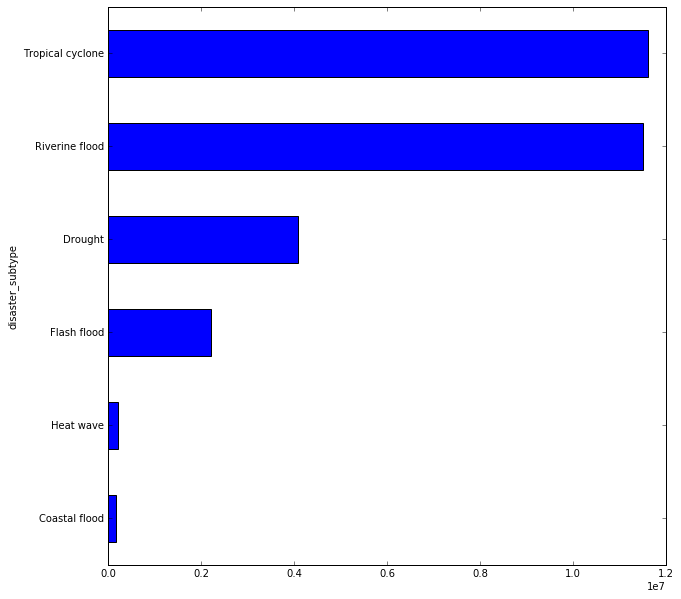

In [120]:
# which are the costliest disaster types in Oceania?
df[df['continent']=='Oceania'].groupby(by='disaster_subtype')['Total_damage_K_USD'].sum().sort_values().plot(kind='barh', figsize=(10,10))

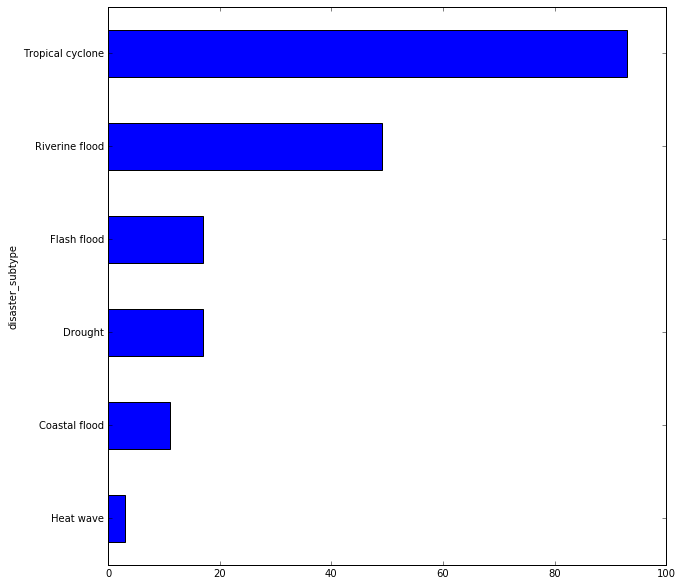

In [121]:
# which are the most frequent disaster types in Oceania?
df[df['continent']=='Oceania'].groupby(by='disaster_subtype')['occurrence'].sum().sort_values().plot(kind='barh', figsize=(10,10))

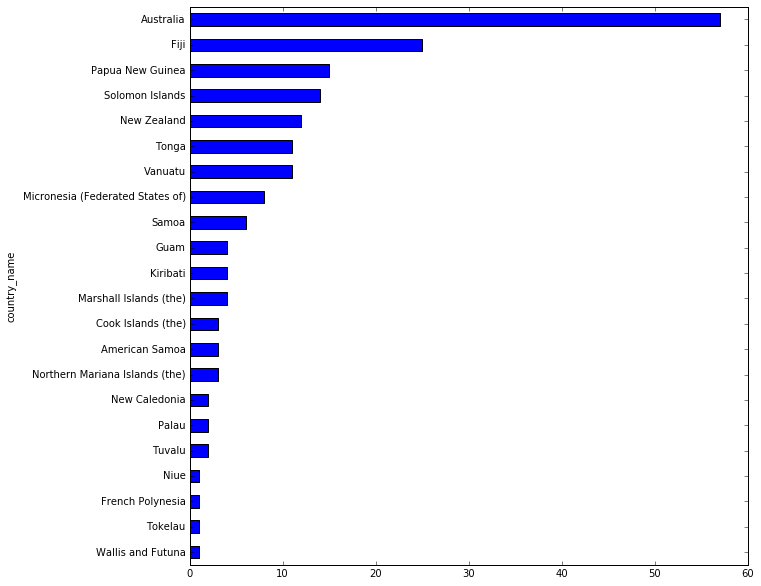

In [122]:
# which are the countries in Oceania where most disasters happened?
df[df['continent']=='Oceania'].groupby(by='country_name')['occurrence'].sum().sort_values().plot(kind='barh', figsize=(10,10))

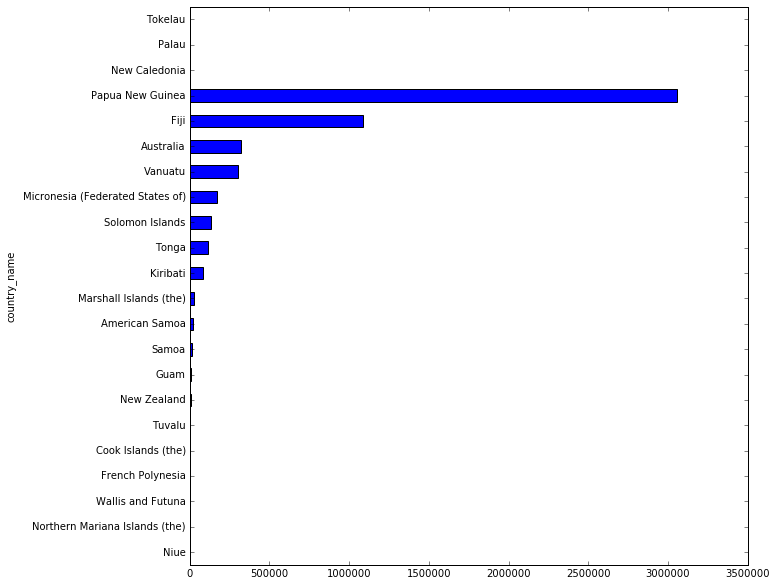

In [123]:
# Which are the countries in Oceania where most people are affected by natural disasters?
df[df['continent']=='Oceania'].groupby(by='country_name')['Affected'].sum().sort_values().plot(kind='barh', figsize=(10,10))

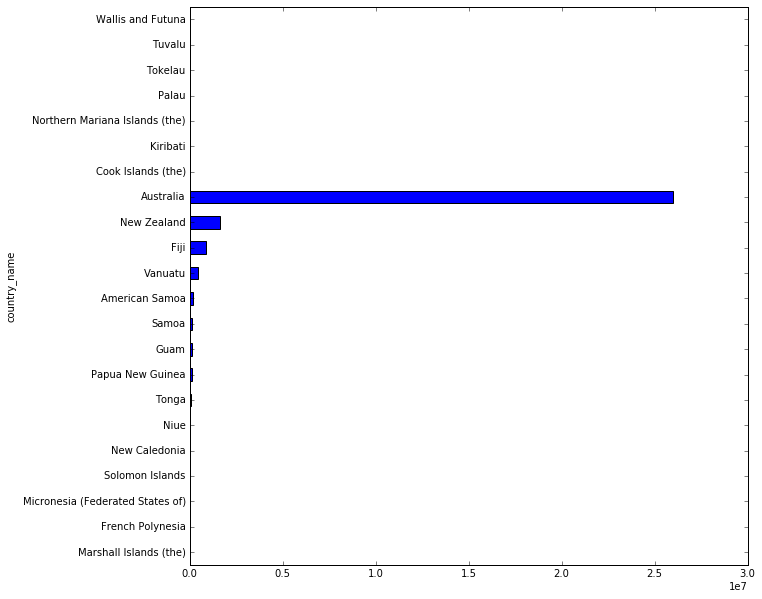

In [124]:
# Which are the countries in Oceania where natural disasters caused the most damage?
df[df['continent']=='Oceania'].groupby(by='country_name')['Total_damage_K_USD'].sum().sort_values().plot(kind='barh', figsize=(10,10))

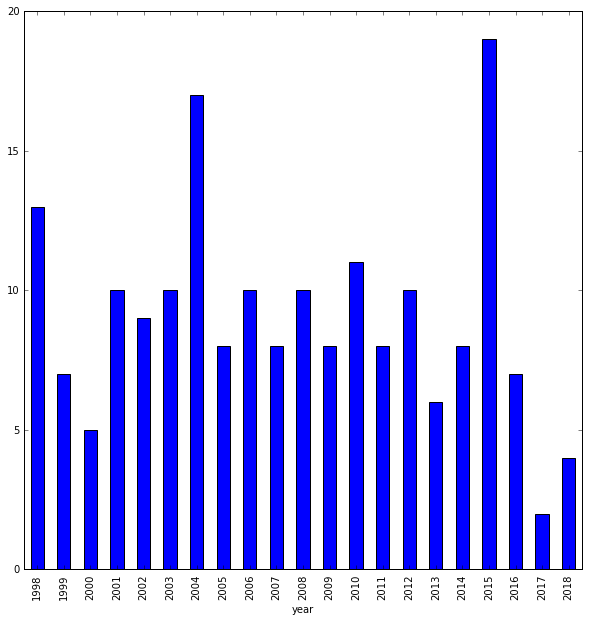

In [125]:
# How many disasters occurred in Oceania by year? // has the frequency increased?
df[df['continent']=='Oceania'].groupby(by='year')['occurrence'].sum().plot(kind = 'bar',figsize=(10,10))

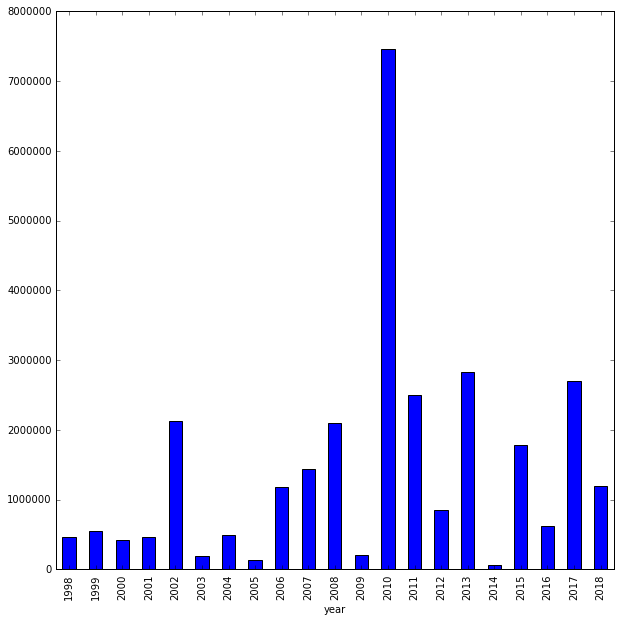

In [126]:
# How much damage did natural disasters cause in Oceania by year?
df[df['continent']=='Oceania'].groupby(by='year')['Total_damage_K_USD'].sum().plot(kind = 'bar',figsize=(10,10))

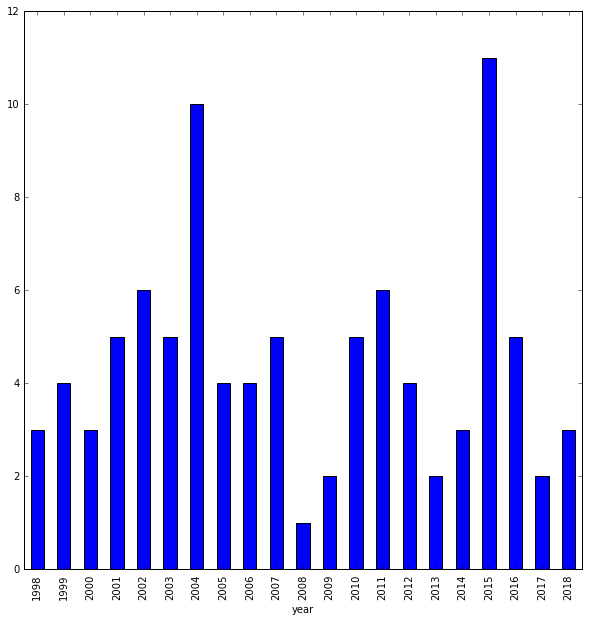

In [127]:
# How frequent have tropical cyclones been in Oceania?
df[(df['continent']=='Oceania')&(df['disaster_subtype']=='Tropical cyclone')].groupby(by='year')['occurrence'].sum().plot(kind = 'bar',figsize=(10,10))

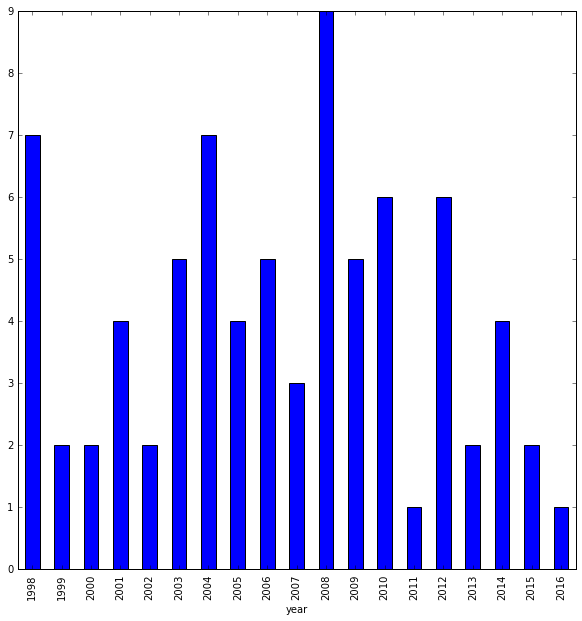

In [128]:
# How frequent have floods been in Oceania
df[(df['continent']=='Oceania')&(df['disaster_type']=='Flood')].groupby(by='year')['occurrence'].sum().plot(kind='bar', figsize=(10,10))

# Caribbean

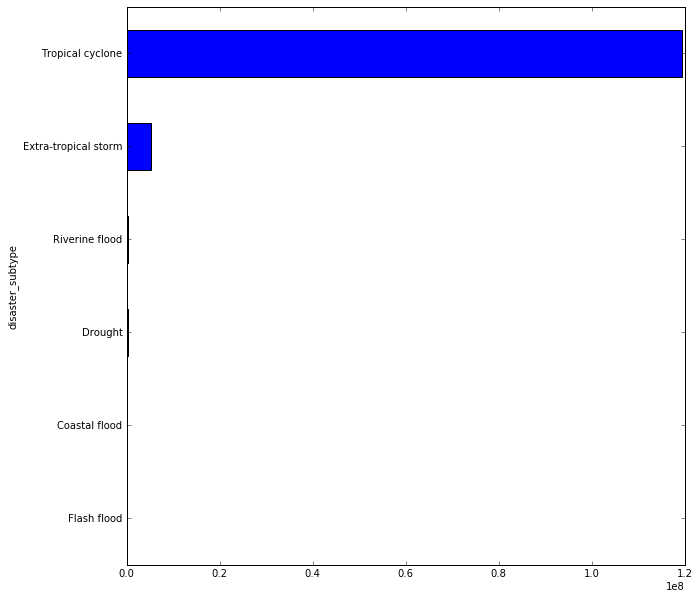

In [129]:
# which are the costliest disaster types in Caribbean?
df[df['region']=='Caribbean'].groupby(by='disaster_subtype')['Total_damage_K_USD'].sum().sort_values().plot(kind='barh', figsize=(10,10))

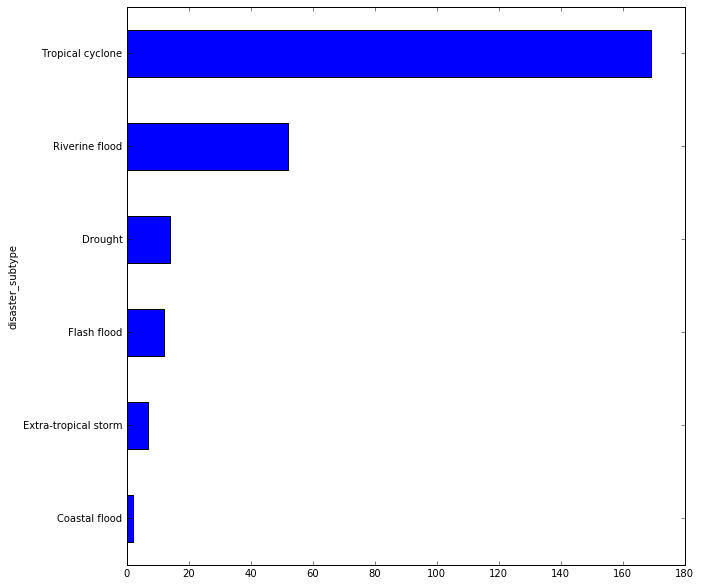

In [130]:
# which are the most frequent disaster types in Caribbean?
df[df['region']=='Caribbean'].groupby(by='disaster_subtype')['occurrence'].sum().sort_values().plot(kind='barh', figsize=(10,10))

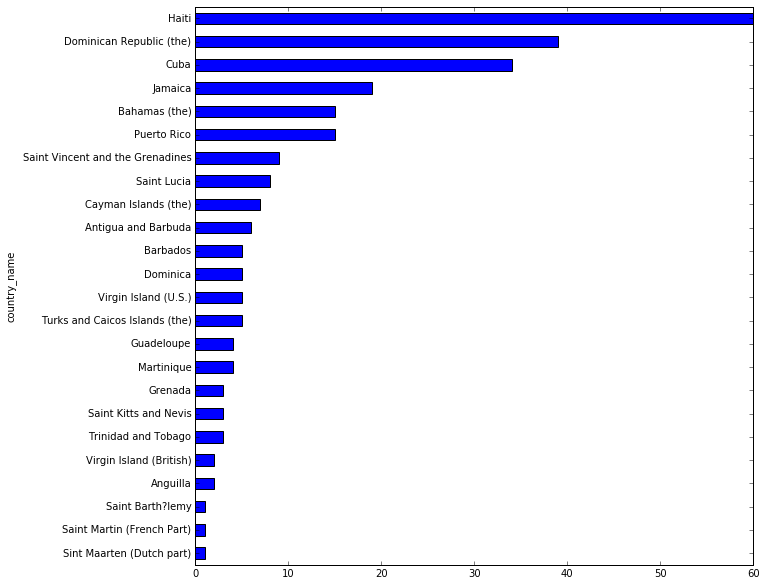

In [131]:
# which are the countries in Caribbean where most disasters happened?
df[df['region']=='Caribbean'].groupby(by='country_name')['occurrence'].sum().sort_values().plot(kind='barh', figsize=(10,10))

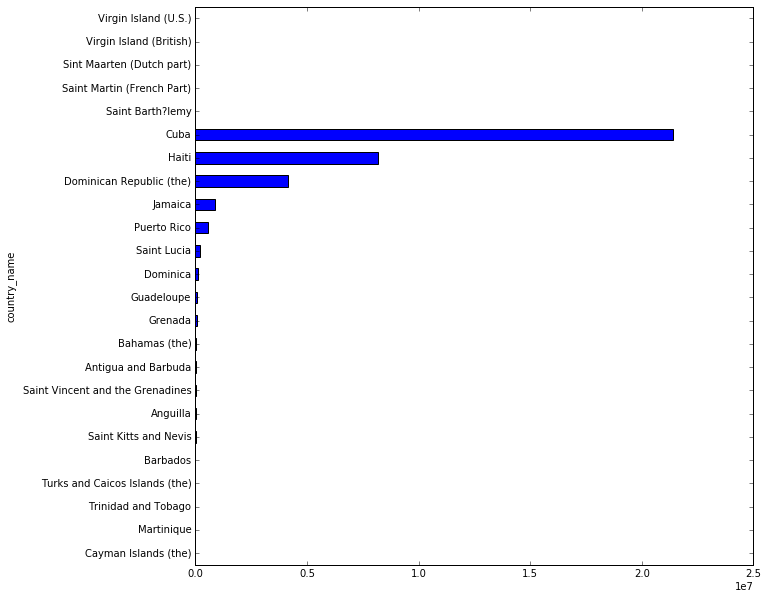

In [132]:
# Which are the countries in Caribbean where most people are affected by natural disasters?
df[df['region']=='Caribbean'].groupby(by='country_name')['Affected'].sum().sort_values().plot(kind='barh', figsize=(10,10))

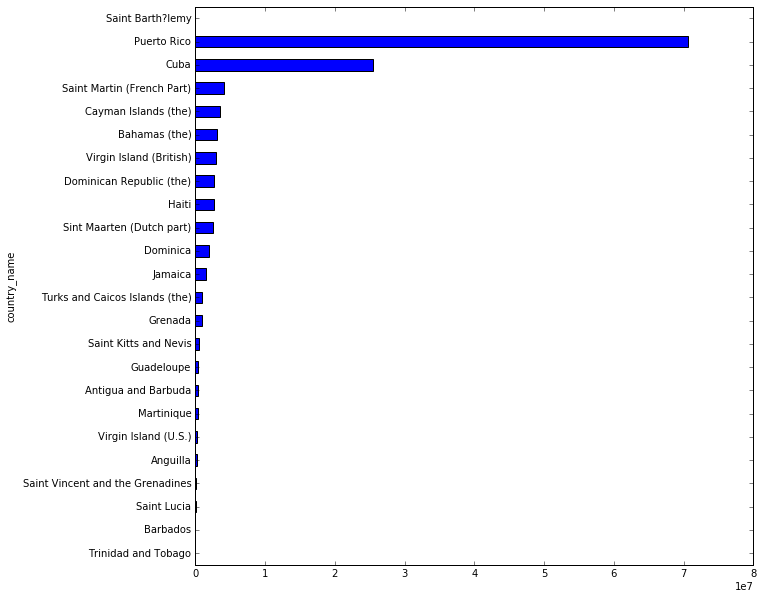

In [133]:
# Which are the countries in Caribbean where natural disasters caused the most damage?
df[df['region']=='Caribbean'].groupby(by='country_name')['Total_damage_K_USD'].sum().sort_values().plot(kind='barh', figsize=(10,10))


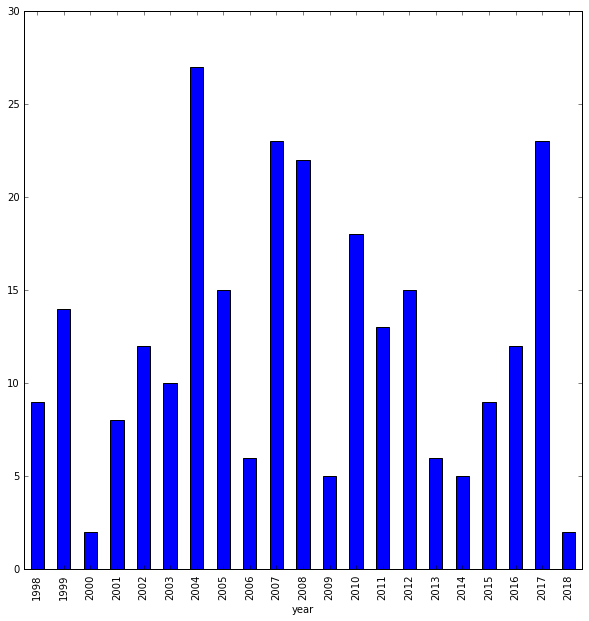

In [134]:
# How many disasters occurred in Caribbean by year? // has the frequency increased?
df[df['region']=='Caribbean'].groupby(by='year')['occurrence'].sum().plot(kind = 'bar',figsize=(10,10))

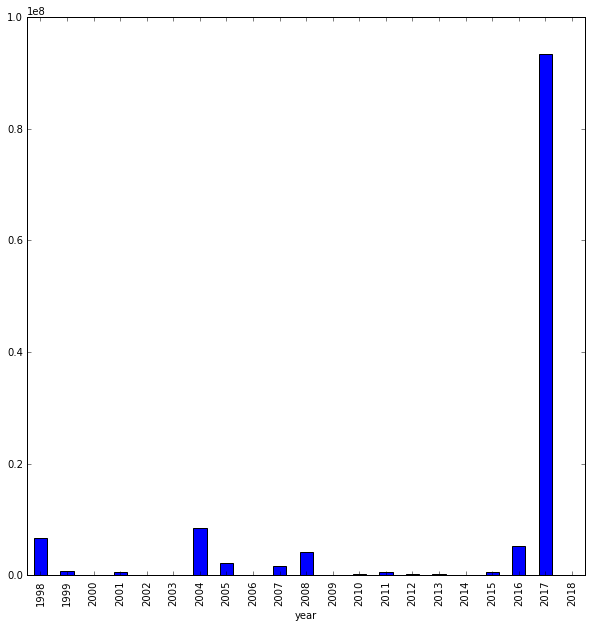

In [135]:
# How much damage did natural disasters cause in Caribbean by year?
df[df['region']=='Caribbean'].groupby(by='year')['Total_damage_K_USD'].sum().plot(kind = 'bar',figsize=(10,10))

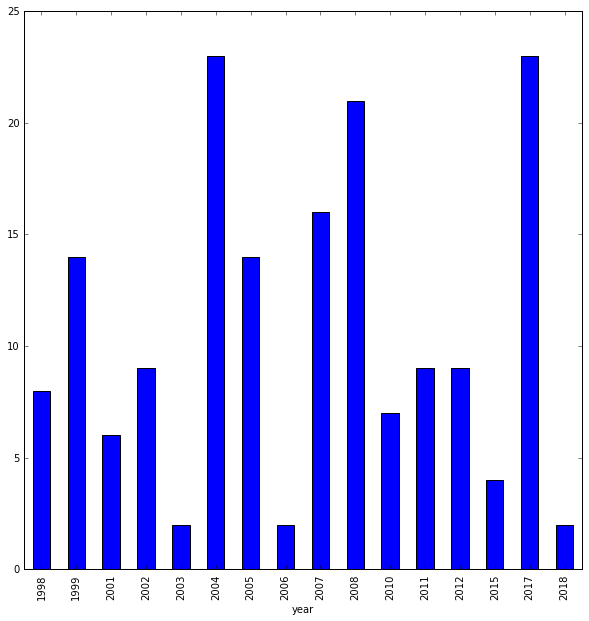

In [136]:
# How frequent have tropical cyclones been in Caribbean?
df[(df['region']=='Caribbean')&(df['disaster_subtype']=='Tropical cyclone')].groupby(by='year')['occurrence'].sum().plot(kind = 'bar',figsize=(10,10))

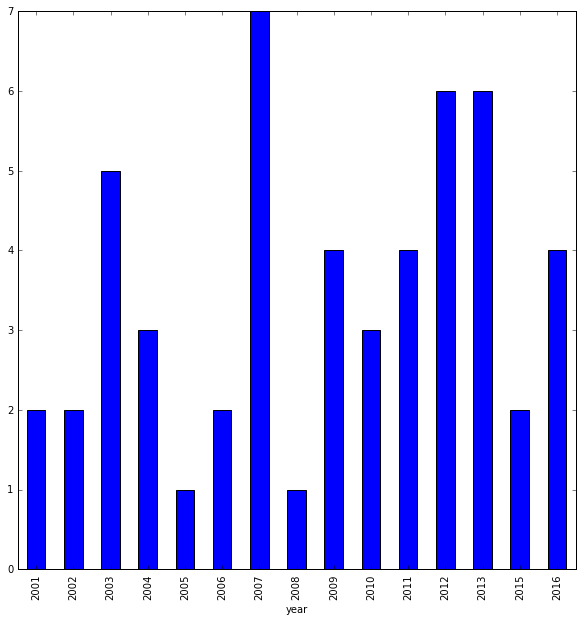

In [137]:

# How frequent have riverine floods been in Caribbean?
df[(df['region']=='Caribbean')&(df['disaster_subtype']=='Riverine flood')].groupby(by='year')['occurrence'].sum().plot(kind = 'bar',figsize=(10,10))